In [1]:
## load library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")


## Problem statment: given the feature , predict the species of an iris flower

### Step 1 :Descriptive analysis (Understand the data)

In [14]:
## load data
iris_data = pd.read_csv("Iris.csv",index_col='Id')
iris_data.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa


In [15]:
## target variable
list(set(iris_data['Species'].tolist()))

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

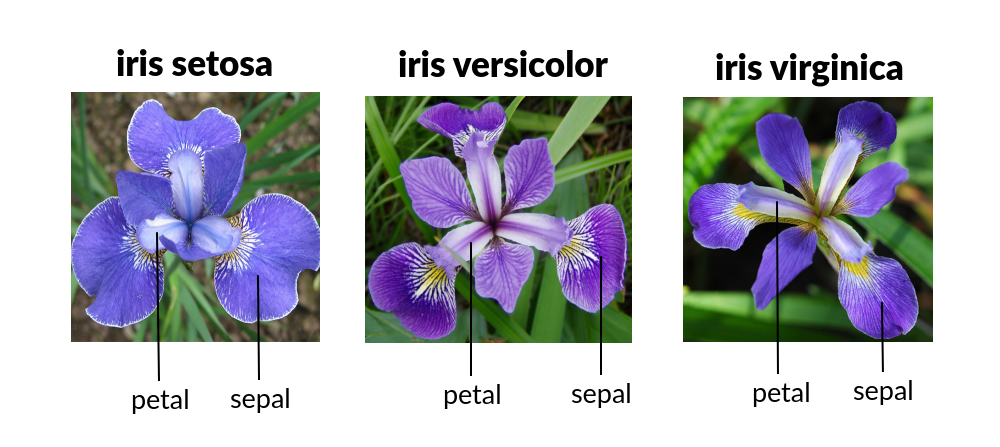

In [11]:
from IPython.display import Image
Image(filename='iris.png') 

### Step 2 :EDA (exploratory data analysis)

In [18]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


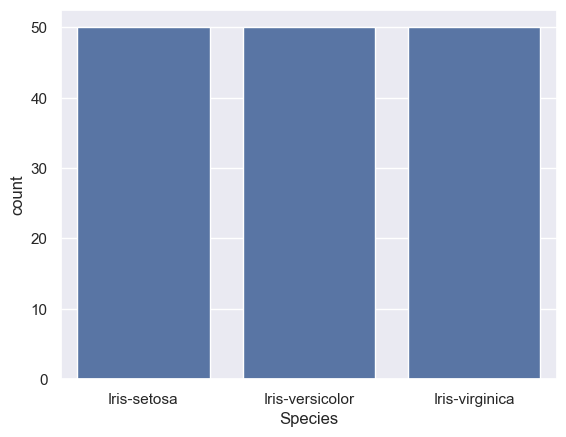

In [16]:
 
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.countplot(x='Species', data=iris_data, )
plt.show()

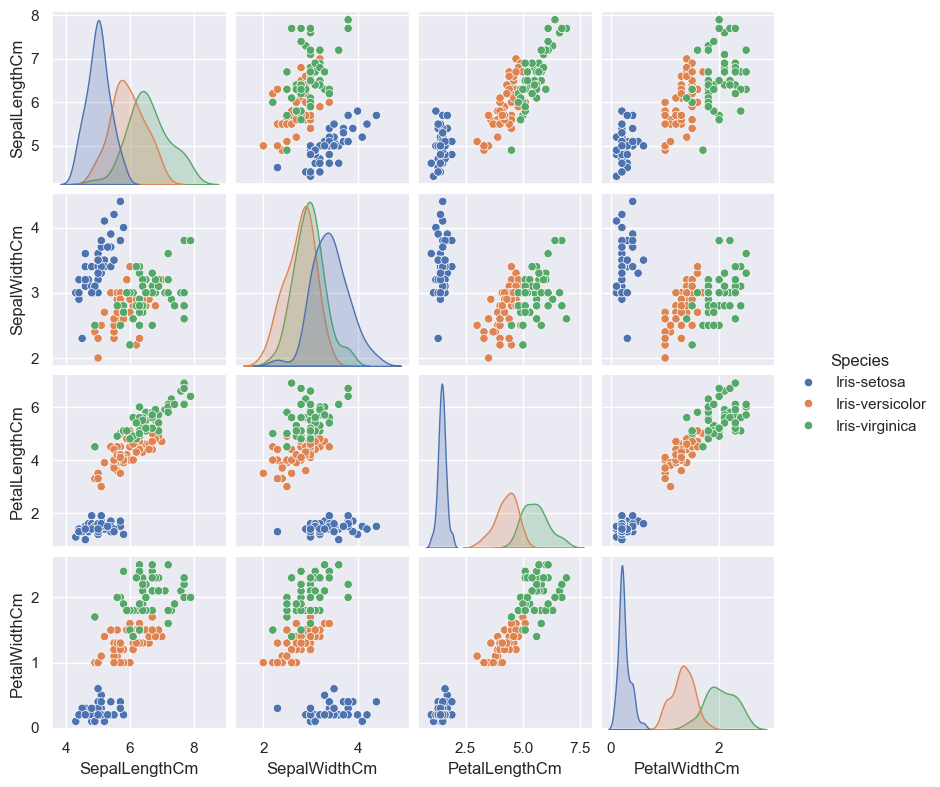

In [19]:
##Relation between variables
## We will see the relationship between the sepal length and sepal width and also between petal length and petal width
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris_data, hue='Species', height=2)


#### We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths.  

In [21]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### We can see the count of each column along with their mean value, standard deviation, minimum and maximum values.
### understand the relation ship between mean and percentails (mean close to 50% leads to normal distribution)

<Axes: xlabel='SepalLengthCm'>

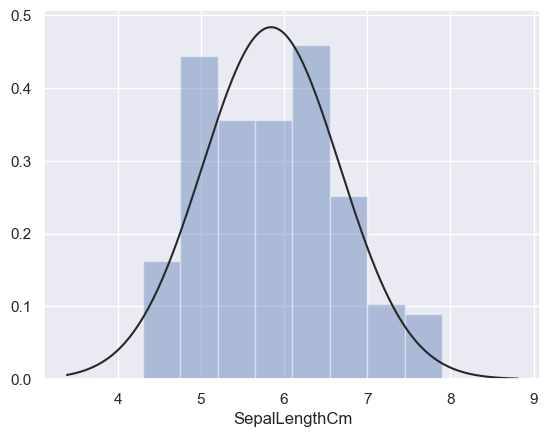

In [23]:
from scipy.stats import norm
sns.distplot(iris_data['SepalLengthCm'], fit=norm, kde=False)
# sns.distplot(iris_data['SepalWidthCm'], fit=norm, kde=False)
# sns.distplot(iris_data['PetalLengthCm'], fit=norm, kde=False)
# sns.distplot(iris_data['PetalWidthCm'], fit=norm, kde=False)


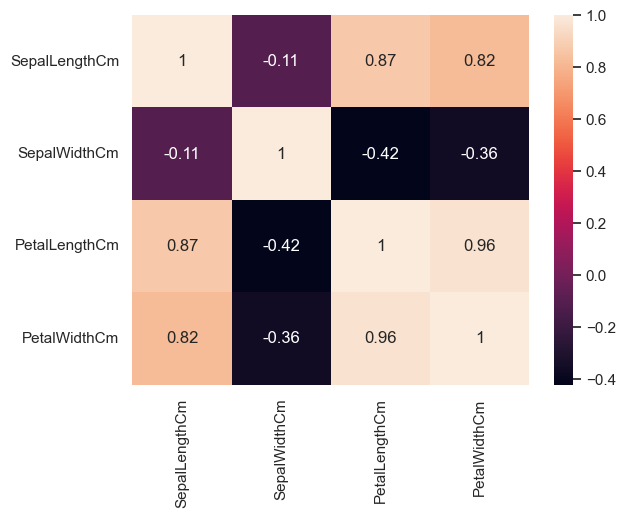

In [25]:
## understand the  correlation between all numerical variables in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.heatmap(iris_data.corr(method='pearson'), annot = True)
 
plt.show()

### From the above graph, we can see that :
### Petal width and petal length have high correlations. 
### Petal length and sepal width have good correlations.
### Petal Width and Sepal length have good correlations.

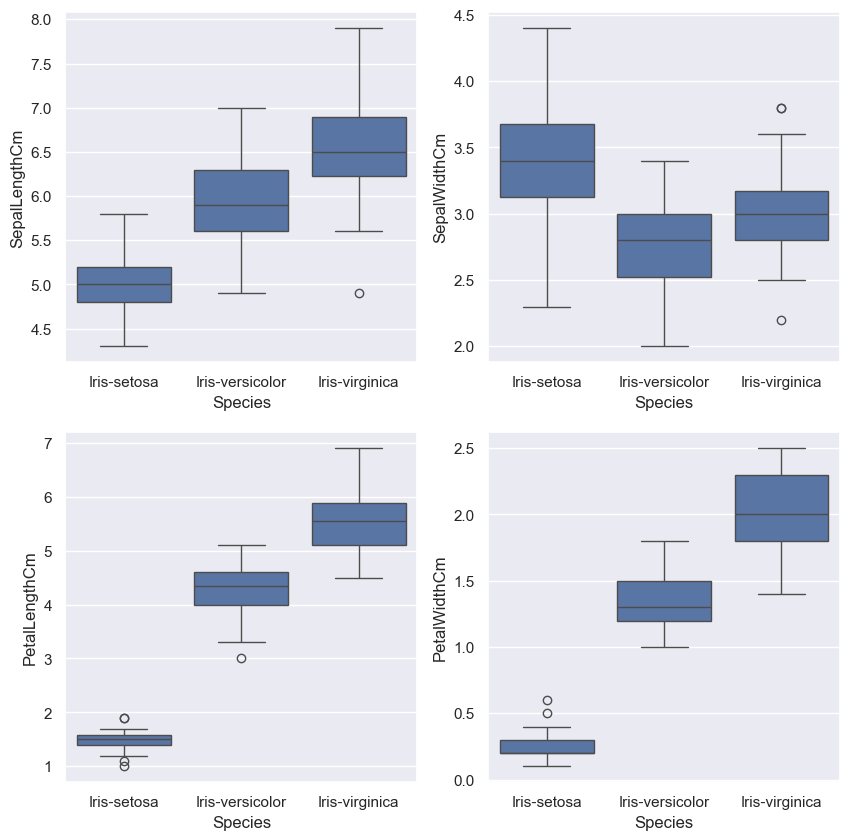

In [27]:
## how the categorical value os distributed with other numerical values. helps to check for outlier
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
df_data=iris_data.copy()
def graph(y):
	sns.boxplot(x="Species", y=y, data=df_data)

plt.figure(figsize=(10,10))
	
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()


#### Species Setosa has the smallest features and less distributed with some outliers.
#### Species Versicolor has the average features.
#### Species Virginica has the highest features

# Handling Outliers

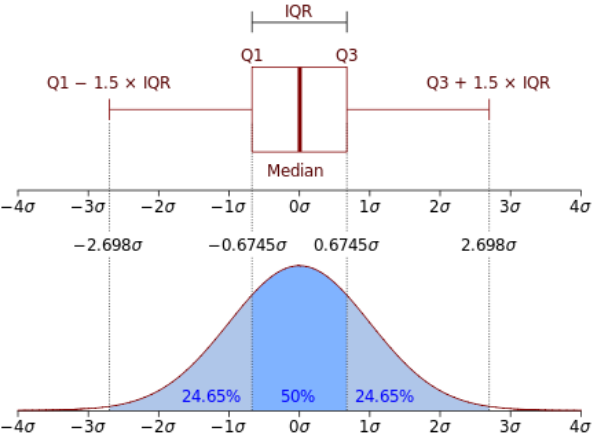

In [32]:
 
from IPython.display import Image
Image(filename='quartile.png') 

In [33]:
print(iris_data.median())

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64


In [35]:
X_feature=iris_data.drop(['Species'],axis=1)

<Axes: xlabel='SepalWidthCm'>

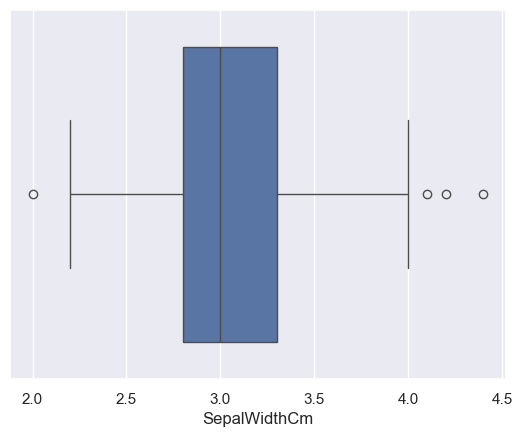

In [70]:
## Handling Outliers
import seaborn as sns
import matplotlib.pyplot as plt
 

sns.boxplot(x='SepalWidthCm', data=iris_data)


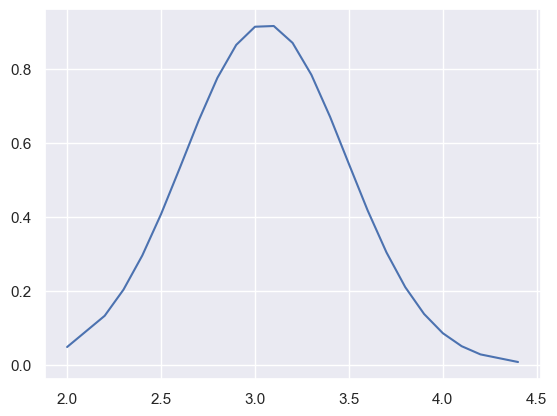

In [82]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 
x_axis=sorted(iris_data['SepalWidthCm'].tolist() )
x_axis=np.array(x_axis)
mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

## Prepare data

In [83]:
 
df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id' ])



Old Shape:  (146, 5)
New Shape:  (146, 5)


<Axes: xlabel='SepalWidthCm'>

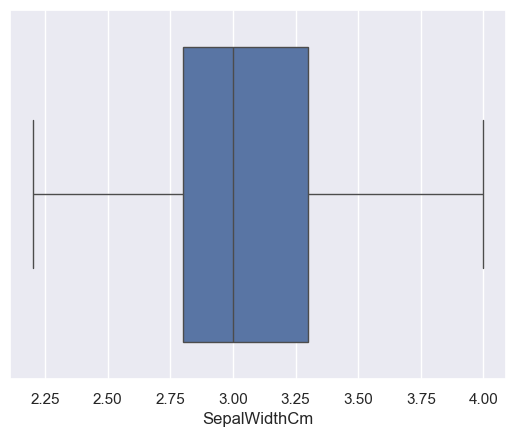

In [95]:
 ## remove outliers
# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
				method = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
				method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)
sns.boxplot(x='SepalWidthCm', data=df)


In [96]:
X_val = df.drop(['Species'],axis=1)
y_val = df.Species
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [97]:
## scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X_val)

### split the data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y_val, test_size = 0.3, random_state=20, stratify=y_val)

<Axes: >

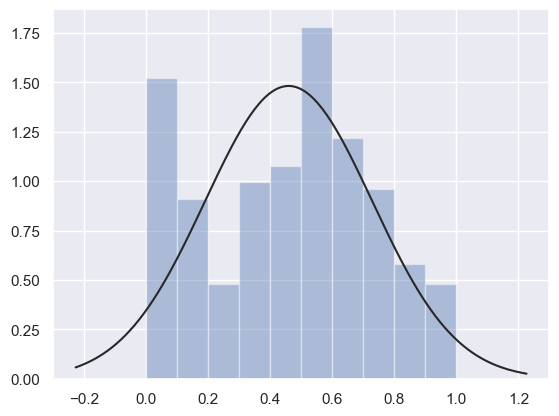

In [99]:
from scipy.stats import norm
sns.distplot(X , fit=norm, kde=False)

## Train  model

### 1: KNN

In [100]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9607843137254902 %
Test score before PCA 0.9772727272727273 %


### 2 . KNN+PCA

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X_val)

pca.get_covariance()

array([[ 0.69571138, -0.03756542,  1.28881011,  0.5216906 ],
       [-0.03756542,  0.15613982, -0.27572886, -0.09908455],
       [ 1.28881011, -0.27572886,  3.08746009,  1.28495276],
       [ 0.5216906 , -0.09908455,  1.28495276,  0.57815446]])

In [102]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.93042172, 0.04694468, 0.01740491, 0.0052287 ])

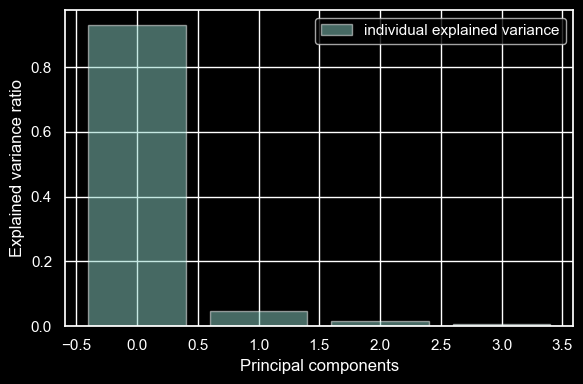

In [103]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [104]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X_val)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_val, test_size = 0.3, random_state=20, stratify=y_val)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")


Train score after PCA 0.9607843137254902 %
Test score after PCA 0.9545454545454546 %


In [105]:
pca=PCA(n_components=1)
X_new=pca.fit_transform(X_val)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_val, test_size = 0.3, random_state=20, stratify=y_val)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")


Train score after PCA 0.9313725490196079 %
Test score after PCA 0.9318181818181818 %


## 3.  SVM

In [106]:
from sklearn import metrics
from sklearn.svm import SVC
 
 
scaler = MinMaxScaler()
X2=scaler.fit_transform(X_val)
X_train_new, X_test_new, y_train, y_test = train_test_split(X2, y_val, test_size = 0.3, random_state=20, stratify=y_val)




svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train_new, y_train) 
y_pred = svm.predict(X_test_new)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
 
 


Accuracy with SVM: 97.73%


In [107]:
 
pca=PCA(n_components=1)
X_new=pca.fit_transform(X_val)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_val, test_size = 0.3, random_state=20, stratify=y_val)

svm.fit(X_train_new,y_train)
y_pred = svm.predict(X_test_new)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
 

Accuracy with SVM: 93.18%


In [111]:
 
pca=PCA(n_components=3)
X_new=pca.fit_transform(X_val)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_val, test_size = 0.3, random_state=20, stratify=y_val)

svm.fit(X_train_new,y_train)
y_pred = svm.predict(X_test_new)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
 

Accuracy with SVM: 100.00%


## calculate the accuracy using F1 score

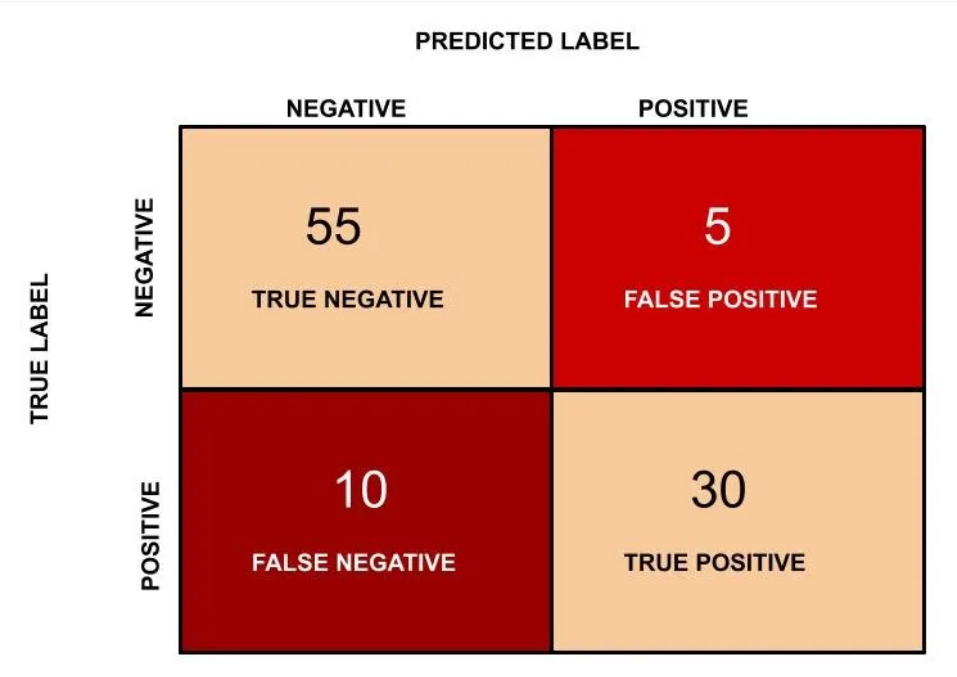

In [116]:
from IPython.display import Image
Image(filename='confusion.png',width=500) 

#### ccuracy of the machine learning model for this classification task?

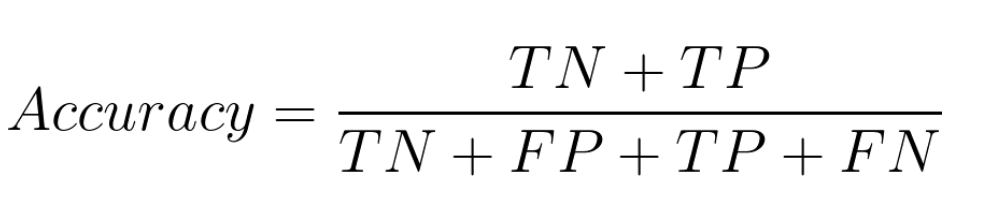

In [117]:
from IPython.display import Image
Image(filename='1.png',width=500) 

##### In this example, Accuracy = (55 + 30)/(55 + 5 + 30 + 10 ) = 0.85 and in percentage the accuracy will be 85%.

In [121]:
# from IPython.display import Image
# Image(filename='2.png',width=500) 

## F1 score

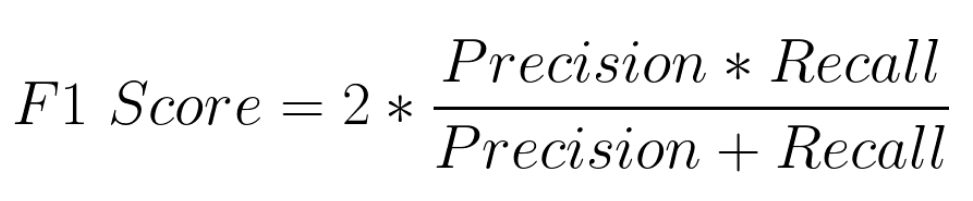

In [124]:
from IPython.display import Image
Image(filename='5.png',width=500) 

## precision

### precision (positive predictive value) in classifying the data instances. Precision is defined as follows:

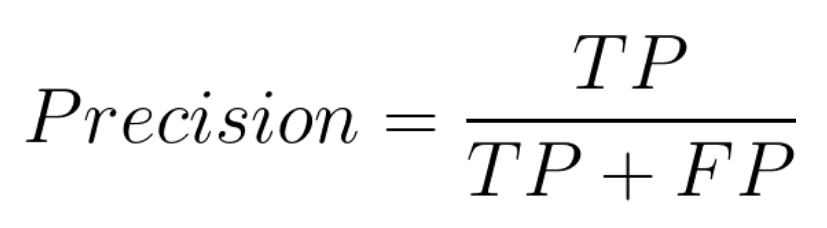

In [120]:
from IPython.display import Image
Image(filename='3.png',width=500) 

###  precision = 30/(30+ 5) = 0.857

## Recall
### Recall is also known as sensitivity or true positive rate and is defined as follows

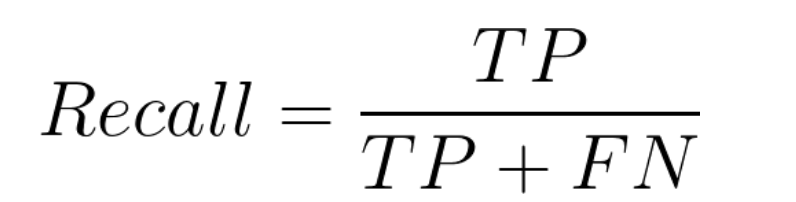

In [123]:
from IPython.display import Image
Image(filename='4.png',width=500) 


### Recall = 30/(30+ 10) = 0.75

## F1 Score = 2* ( 0.857 * 0.75)/(0.857 + 0.75) = 0.799.